In [1]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from skimage import io

C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


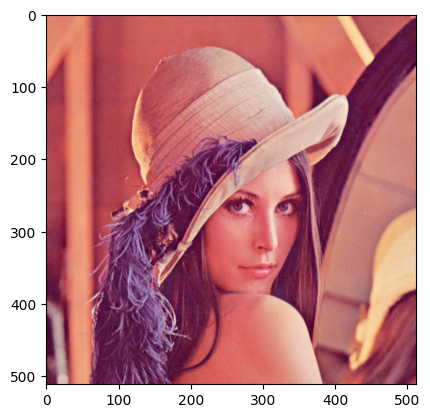

In [2]:
img1 = plt.imread('lenna.png')
plt.imshow(img1)

In [3]:
img2 = cv2.imread('lenna.png')

### Accesssing pixel values

In [4]:
img2

array([[[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       ...,

       [[ 60,  18,  84],
        [ 60,  18,  84],
        [ 58,  27,  92],
        ...,
        [ 84,  73, 173],
        [ 76,  68, 172],
        [ 79,  62, 177]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]]

In [5]:
img2.shape

(512, 512, 3)

In [6]:
img2[0,0].shape

(3,)

In [7]:
x= img1[0,0]
x = x.reshape(1,1,3)

In [8]:
x,x.shape

(array([[[0.8862745 , 0.5372549 , 0.49019608]]], dtype=float32), (1, 1, 3))

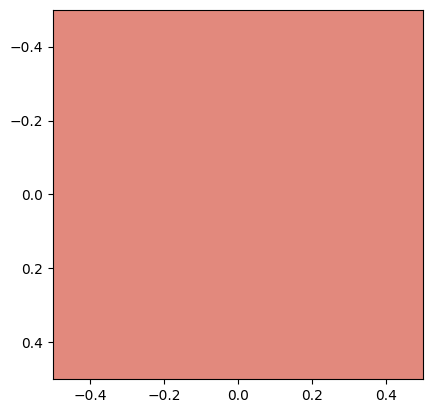

In [9]:
plt.imshow(x)

In [10]:
y= img2[0,0]
y = y.reshape(1,1,3)

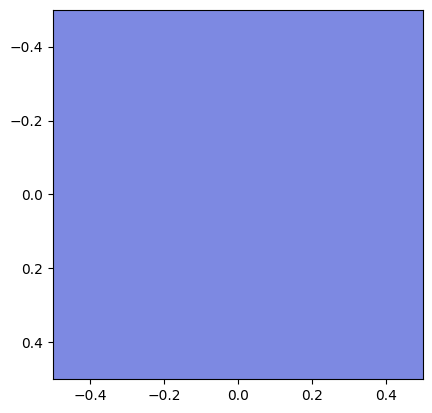

In [11]:
plt.imshow(y)

### change pixel color

In [12]:
img1[200,100]

array([0.6862745 , 0.23137255, 0.27058825], dtype=float32)

In [13]:
import numpy as np
img1[200,100] = np.array([0,0,0])

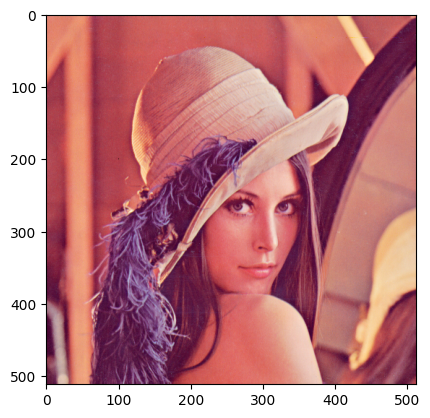

In [14]:
plt.imshow(img1)

In [15]:
img1[0]

array([[0.8862745 , 0.5372549 , 0.49019608],
       [0.8862745 , 0.5372549 , 0.49019608],
       [0.8745098 , 0.5372549 , 0.52156866],
       ...,
       [0.9019608 , 0.5803922 , 0.47843137],
       [0.8666667 , 0.50980395, 0.43137255],
       [0.78431374, 0.3882353 , 0.3529412 ]], dtype=float32)

In [16]:
img1[120] = np.array([0,0,0])

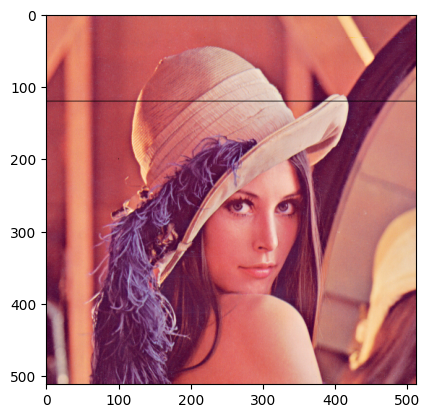

In [17]:
plt.imshow(img1)

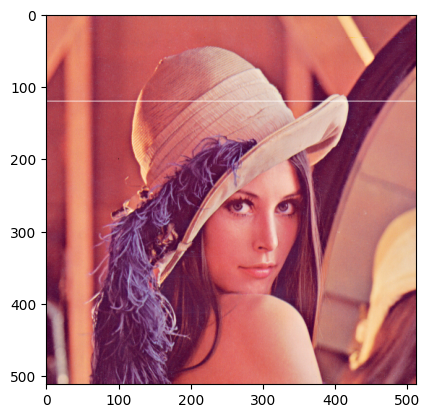

In [18]:
img1[120] = np.array([1,1,1])
plt.imshow(img1)

### iterating the pixel

In [19]:
x = np.array([[4,5,6],[8,7,3]])

In [20]:
x

array([[4, 5, 6],
       [8, 7, 3]])

In [21]:
for row in (x):
    for col in row:
        print(col+1.5)

5.5
6.5
7.5
9.5
8.5
4.5


In [22]:
for i in range(200,301):
    for j in range(200,301):
        img2[i,j]=np.array([128,128,0],dtype=np.uint8)


In [23]:
cv2.imshow('Image',img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [24]:
for i in range(200,301):
    for j in range(200,301):
        img2[i,j]=np.array([0,255,255],dtype=np.uint8)

In [25]:
cv2.imshow('Image',img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

### getting pixel using pillow

In [26]:
img3 = Image.open('lenna.png')

In [27]:
pixel = img3.getpixel((0,0))

In [28]:
pixel

(226, 137, 125)

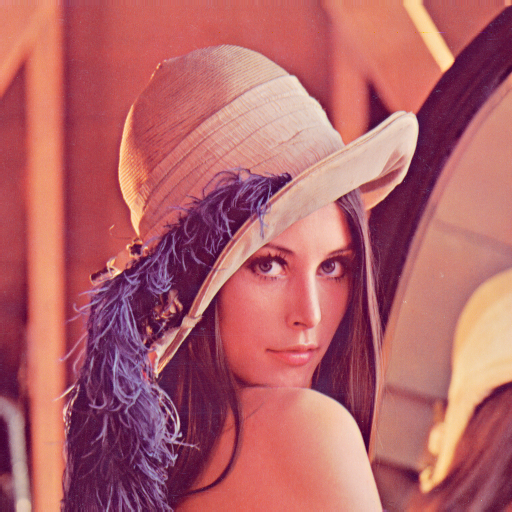

In [29]:
img3

In [30]:
img3.putpixel((250,250),(0,0,0))   #changing pixel of 250,250 by 0,0,0

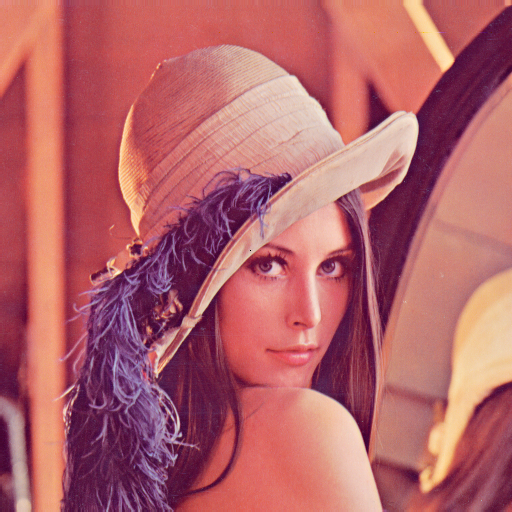

In [31]:
img3

In [32]:
for i in range(512):
    img3.putpixel((i,i),(0,0,0))

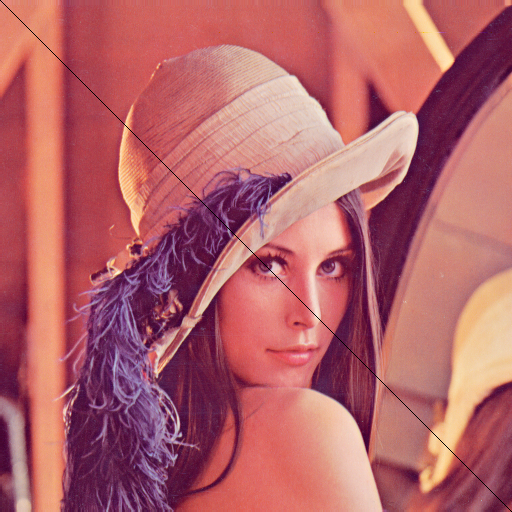

In [33]:
img3

In [34]:
for i in range(512):
    for j in range(512):
        if (i+j)==512:
            img3.putpixel((i,j),(0,0,0))

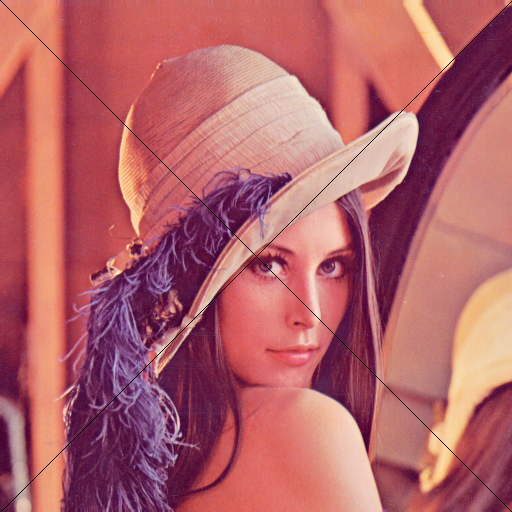

In [35]:
img3

In [36]:
for i in range(-512):
    img3.putpixel((i,i),(0,0,0))

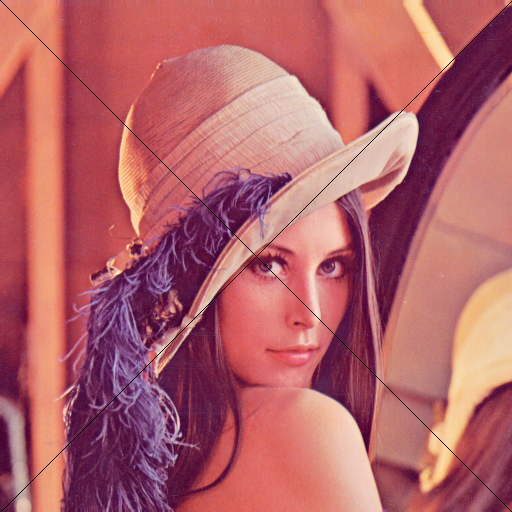

In [37]:
img3

### video processing

In [38]:
vid = cv2.VideoCapture('robots.mp4')

In [39]:
vid

< cv2.VideoCapture 00000213F18D4150>

In [40]:
ret,frame = vid.read()

In [41]:
ret

True

In [42]:
frame.shape

(640, 640, 3)

In [43]:
cv2.imshow('First Frame',frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

## metadata of video

In [44]:
width = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))  
height = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))
frames = int(vid.get(cv2.CAP_PROP_FRAME_COUNT))
fps = int(vid.get(cv2.CAP_PROP_FPS))

In [45]:
width,height,frames,fps

(640, 640, 1799, 30)

In [46]:
vid = cv2.VideoCapture('robots.mp4')
while True:
    ret,frame=vid.read()
    if not ret:
        break
    cv2.imshow('Video', frame)
    if cv2.waitKey(5)==ord('q'):
        break
cv2.destroyAllWindows()

In [47]:
vid = cv2.VideoCapture('robots.mp4')
#get the first frame and see if successful
success,frame = vid.read()
#initiate count
count=1
#keep extracting frames as long as sucess is true
while success:
    cv2.imwrite(f'image\{count}.jpg',frame)
    success,frame = vid.read()
    count+=1
    

### working with timestamp on frames

In [48]:
#get frames at a specific timestamp
timestamp = '00:00:43.00'
hours ,minutes,seconds = [float(i) for i in timestamp.split(':')]
print(hours ,minutes,seconds)

0.0 0.0 43.0


In [49]:
timestamp = '00:00:43.00'
timestamp.split(':')

['00', '00', '43.00']

In [50]:
#get numbers from frame up to timestamp
trigger_frame = hours *3600 * fps + minutes *60 *fps + seconds * fps
print(frames,trigger_frame)

1799 1290.0


In [51]:
#go to frame selected by timestamp
vid.set(1,trigger_frame)
success,frame = vid.read()

#save the frame into an image file
if success:
    cv2.imwrite('screen.jpg',frame)
    

In [52]:
cv2.imshow('Frame',frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Capture videos  with cameras

In [53]:
cap = cv2.VideoCapture(0)

In [54]:
if cap.isOpened()==True:
    print('Camera is Present!')
else:
    print('Camera NOT available!')

Camera NOT available!


In [57]:
#read until video is completed
while (cap.isOpened()):
    #Capture frame by freame
    ret,frame = cap.read()
    if ret == True:
        #display the resulting frame
        cv2.imshow('Frame',frame)
        #press q to exit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
#when everything done,relaese the video capture object
cap.release()

#closes all frames
cv2.destroyAllWindows()

 ### capture and store videos

In [58]:
# create an objct to read
#from camera
video = cv2.VideoCapture(0)

In [60]:
# we need to set resolution .,so convert them from float to int
frame_width = int(video.get(3))
frame_height = int(video.get(4))

size = (frame_width,frame_height)

In [61]:
size

(0, 0)

In [62]:
#below videowriter objcet will create a frame of above defined output
#is stored in 'filename.avi' file
result = cv2.VideoWriter('myvid.avi',cv2.VideoWriter_fourcc(*'MJPG'),30,size)

In [63]:
while(True):
    ret,frame = video.read()
    if ret== True:
        #write the frame into the file
        result.write(frame)
        #display the frame saved in the file
        cv2.imshow('Frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('s'):
            break
    else:
        break
cv2.destroyAllWindows()
video.release()